# Diabetes, Hypertension, Hyperlidemia comorbidity

In [67]:
import numpy as a
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [68]:
# import dataset
dataset = pd.read_csv("dhh_all_2016.csv")
census = pd.read_csv("census.csv")

#add a column for percentage|
dataset['% Ensured'] = dataset['BTLPAN'] / dataset['BTLPAD'] * 100


# filter to important info
num_ppl = dataset.groupby("CT").sum()['% Ensured']
num_ppl.sort_values(ascending=False)

CT
980000    25.000000
483800    11.177474
428100    10.596026
482500    10.236220
512000    10.143198
            ...    
70500      1.847826
140200     1.406800
70800      1.337296
980100     0.000000
980700     0.000000
Name: % Ensured, Length: 390, dtype: float64

  
**This is a simple, sorted dataset, where the left column represents a census tract, and the right column the percent of people in that census tract that have been diagnosed, ensured, and medicated for having diabetes, hypertension, and hyperlidemia diseases. This encompasses all of Allegheny County, so we can create a dataset that represents only neighborhoods in Pittsburgh, as well as assign them to a name, using Pittsburgh Census Tract data from the same year**

In [69]:
# import dataset
dataset = pd.read_csv("dhh_all_2016.csv")
census = pd.read_csv("census.csv")

#add a column for percentage|
dataset['% Ensured'] = dataset['BTLPAN'] / dataset['BTLPAD'] * 100

pittCTs = census['tractce10'].tolist()

for index, row in dataset.iterrows():
    if int(row['CT']) not in pittCTs:
        dataset = dataset.drop(index)
    


# filter to important info
num_ppl = dataset.groupby("CT").sum()['% Ensured']
num_ppl.sort_values(ascending=False)

CT
980000    25.000000
30500      9.545984
241200     9.164420
262000     8.939709
240600     8.934338
            ...    
70500      1.847826
140200     1.406800
70800      1.337296
980100     0.000000
980700     0.000000
Name: % Ensured, Length: 126, dtype: float64

**This dataset encompasses the percentage for only Pittsburgh neighborhoods, but we can do better by adding a label to each one using the census data**

In [70]:
dataset

,CT,BTLPAD,BTLPAN,BTLWAD,BTLWAN,BTLMAD,BTLMAN,% Ensured
0,10300,422,12,197,5,225,7,2.843602
1,20100,2610,49,1242,17,1368,32,1.877395
2,20300,354,11,175,3,179,8,3.107345
3,30500,859,82,553,59,306,23,9.545984
4,40200,388,25,233,16,155,9,6.443299
...,...,...,...,...,...,...,...,...
377,563100,1867,106,992,58,875,48,5.677558
378,563200,700,36,359,18,341,18,5.142857
387,980000,4,1,3,1,1,0,25.000000
388,980100,7,0,6,0,1,0,0.000000


In [71]:
dataset.insert(0, 'Neighborhood', pd.NaT)

for index, row in dataset.iterrows():
    for Cindex, Crow in census.iterrows():
        if int(row['CT']) == int(Crow['tractce10']):
            name = Crow['hood']
            dataset.at[index, 'Neighborhood'] = name
            
dataset = dataset.drop_duplicates(subset='Neighborhood', keep='first')
            
dataset
    

,Neighborhood,CT,BTLPAD,BTLPAN,BTLWAD,BTLWAN,BTLMAD,BTLMAN,% Ensured
0,Bluff,10300,422,12,197,5,225,7,2.843602
1,Central Business District,20100,2610,49,1242,17,1368,32,1.877395
2,Strip District,20300,354,11,175,3,179,8,3.107345
3,Crawford-Roberts,30500,859,82,553,59,306,23,9.545984
4,West Oakland,40200,388,25,233,16,155,9,6.443299
...,...,...,...,...,...,...,...,...,...
374,Oakwood,562800,622,47,332,27,290,20,7.556270
376,Windgap,563000,1159,89,669,46,490,43,7.679034
377,Westwood,563100,1867,106,992,58,875,48,5.677558
378,East Allegheny,563200,700,36,359,18,341,18,5.142857


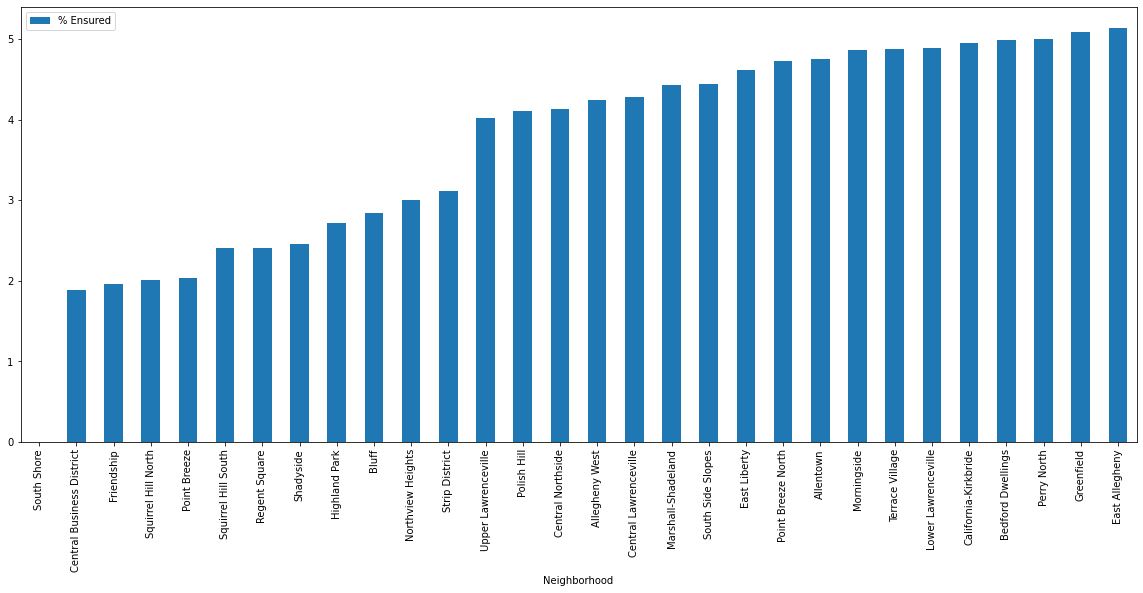

In [72]:
dataset = dataset.sort_values('% Ensured')
dataset.head(30).plot.bar(x='Neighborhood', y='% Ensured', figsize=(20,8))


**Top 30 Insured neighborhoods in Pittsburgh, by percentage**

In [76]:

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

neighborhoods.plot()

print(dataset.columns)


DriverError: Unable to open Neighborhoods_.shx or Neighborhoods_.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [57]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")


datamap = neighborhoods.merge(dataset, how='left', left_on='hood', right_on='Neighborhood')



datamap.plot(column='', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

NameError: name 'geopandas' is not defined